## Исследование данных о российском кинопрокате



In [145]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Описание данных

Таблица mkrf_movies содержит информацию из реестра прокатных удостоверений. У одного фильма может быть несколько прокатных удостоверений.

- title — название фильма;
- puNumber — номер прокатного удостоверения;
- show_start_date — дата премьеры фильма;
- type — тип фильма;
- film_studio — студия-производитель;
- production_country — страна-производитель;
- director — режиссёр;
- producer — продюсер;
- age_restriction — возрастная категория;
- refundable_support — объём возвратных средств государственной поддержки;
- nonrefundable_support — объём невозвратных средств государственной поддержки;
- financing_source — источник государственного финансирования;
- budget — общий бюджет фильма;
- ratings — рейтинг фильма на КиноПоиске;
- genres — жанр фильма.

Обратите внимание, что столбец budget уже включает в себя полный объём государственной поддержки. Данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку.
Таблица mkrf_shows содержит сведения о показах фильмов в российских кинотеатрах.

- puNumber — номер прокатного удостоверения;
- box_office — сборы в рублях.

### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм.

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

In [146]:
df_movies = pd.read_csv('mkrf_movies.csv')
df_shows = pd.read_csv('mkrf_shows.csv')

In [147]:
print(f'df_movies: {df_movies.shape} \n df_shows: {df_shows.shape}')

df_movies: (7486, 15) 
 df_shows: (3158, 2)


In [148]:
df_movies.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


In [149]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [150]:
df_shows.head()

,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08


In [151]:
df_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


In [152]:
df_m_cols = list(df_movies.columns)
df_s_cols = list(df_shows.columns)

print(f'df_m_cols: {df_m_cols}')
print(f'df_s_cols: {df_s_cols}')
print(f'Пересесение: {set(df_m_cols) & set(df_s_cols)}')

df_m_cols: ['title', 'puNumber', 'show_start_date', 'type', 'film_studio', 'production_country', 'director', 'producer', 'age_restriction', 'refundable_support', 'nonrefundable_support', 'budget', 'financing_source', 'ratings', 'genres']
df_s_cols: ['puNumber', 'box_office']
Пересесение: {'puNumber'}


Столбец по которону будем соединаять таблицы: puNumber. Но типы столбцов не совпадают. В таблице df_movies поменяем тип на int.

In [153]:
df_movies.loc[df_movies['puNumber'] == 'нет']

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


In [154]:
df_movies.loc[df_movies['puNumber'] == 'нет'] = '0'

In [155]:
df_movies['puNumber'] = df_movies['puNumber'].astype(int)

In [156]:
df = df_movies.merge(df_shows, how='left', on='puNumber')

In [157]:
df.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


In [158]:
df['puNumber'].loc[df['puNumber'].isna() == True].count()

0

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     333 non-null    object 
 10  nonrefundable_support  333 non-null    object 
 11  budget                 333 non-null    object 
 12  financing_source       333 non-null    object 
 13  ratings                6520 non-null   object 
 14  genres                 6511 non-null   object 
 15  box_

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

In [160]:
df.head(1)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN


In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     333 non-null    object 
 10  nonrefundable_support  333 non-null    object 
 11  budget                 333 non-null    object 
 12  financing_source       333 non-null    object 
 13  ratings                6520 non-null   object 
 14  genres                 6511 non-null   object 
 15  box_

In [162]:
df = df.loc[df['puNumber'] != 0]

In [163]:
df.loc[df['puNumber'] == 0]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office


Видно, что для некоторых столбцов не подходят типы.

- show_start_date -> dateTime
- budget -> float
- ratings -> float
- refundable_support -> float
- nonrefundable_support -> float
- box_office -> float


In [164]:
date_format = "%Y-%m-%dT%H:%M:%S.%fZ"
df['show_start_date'] = pd.to_datetime(df['show_start_date'],
                                       format=date_format)

<ipython-input-164-0ebf0a77deb7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['show_start_date'] = pd.to_datetime(df['show_start_date'],


In [165]:
df['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

In [166]:
df = df.dropna(subset = ['ratings'])

In [167]:
df.loc[df['ratings'].str.endswith('%')].head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
259,Прошлое,221030715,2015-07-29 12:00:00,Художественный,"20 Сенчюри Фокс де Архентина, Чемо, ЭйчБи Филм...",Аргентина - Бразилия,Эктор Бабенко,"Эктор Бабенко, Оскар Крамер, Хуго Сидмэн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,99%,"ужасы,триллер,драма",NaN
811,От винта!,114000212,2012-08-06 12:00:00,Анимационный,"ЗАО ""Продюсерский центр ""Парадиз""",Россия,О.Лопато,"Г.Нерсисян, А.Манасарян, А.Нерсесян",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,28%,"детский,приключения,комедия",1740.0
1053,Песочный человек,121029212,2012-11-29 12:00:00,Художественный,Спотлайт Медиа Продакшн,Швейцария,Питер Луизи,"Дэвид Луизи, Питер Луизи",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,97%,"ужасы,фантастика,фэнтези",NaN
1341,Сказка о добре и Вре,111008913,2013-11-15 12:00:00,Художественный,"НП ""Студия игрового кино ""Лик""",Россия,Е.Шиляева,К.Терещенко,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,99%,"триллер,драма,детектив",NaN
1805,Спираль.,111001014,2014-01-30 12:00:00,Художественный,"ООО ""Компания Питон""",Россия,А.Волгин,Е.Ковалева,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,99%,"аниме,мультфильм,ужасы",4295.0


In [168]:
df = df.loc[df['ratings'].str.endswith('%') == False]

In [169]:
arr_columns_to_float = ['budget', 'ratings', 'refundable_support', 'nonrefundable_support', 'box_office']

for col in arr_columns_to_float:
    df[col] = pd.to_numeric(df[col])

<ipython-input-169-b3818ae4c316>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col])


##### **Вывод по стобцу ratings:**

Я предположил, что рейтинг в виде процентов – это доля от 10. Однако это не подтвердилось. Я проверил несколько фильмов из списка, имеющих рейтинг в процентах, и сравнил их с реальными рейтингами, найденными в интернете. Оказалось, что эти значения сильно отличаются от ожидаемых.

##### **Вывод**
- Значения в столбце show_start_date были преобразованы в тип datetime.
- Значения в столбце ratings были отфильрованы. Остались только те, что не содержат процентов и явлются вещественными числами от 0 до 10.

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6490 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  6490 non-null   object        
 1   puNumber               6490 non-null   int64         
 2   show_start_date        6490 non-null   datetime64[ns]
 3   type                   6490 non-null   object        
 4   film_studio            6485 non-null   object        
 5   production_country     6488 non-null   object        
 6   director               6487 non-null   object        
 7   producer               6012 non-null   object        
 8   age_restriction        6490 non-null   object        
 9   refundable_support     314 non-null    float64       
 10  nonrefundable_support  314 non-null    float64       
 11  budget                 314 non-null    float64       
 12  financing_source       314 non-null    object        
 13  ratings 

In [171]:
df.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                 5
production_country          2
director                    3
producer                  478
age_restriction             0
refundable_support       6176
nonrefundable_support    6176
budget                   6176
financing_source         6176
ratings                     0
genres                      6
box_office               3591
dtype: int64

- В film_studio. Всего 5 пропусков;
- Пропуски в production_country. Всего 2 пропуска, эти картины из России;
- Пропуски в director. Всего 3 пропусков;
- В producer - 468 пропусков;
- В разделе refundable_support, nonrefundable_support, budget и financing_source отсутствуют важные данные. Однако в описании указано, что эти сведения актуальны только для фильмов, получивших государственную поддержку. Бюджет таких фильмов указан с учётом государственной поддержки.;
- Пропусов в genres всего 6

##### Пропуски в столбце **film_studio**

In [172]:
df.loc[df['film_studio'].isna() == True].head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1293,Stars in Shorts,121011114,2014-06-03 12:00:00,Художественный,NaN,"США, Великобритания","Роберт Фестингер, Руперт Френд, Джей Камен, Ни...","Татьяна Келли, Роберта Мунро, Руперт Френд, До...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.3,комедия,NaN
4441,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.0,"мультфильм,комедия",NaN
6485,До и После,112014418,2018-12-05 12:00:00,Документальный,NaN,Россия,А.Новокреповская,А.Новокреповская,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.9,"драма,криминал,детектив",NaN
6498,В плену города грёз,112014818,2018-12-06 12:00:00,Документальный,NaN,Россия,В.Витовцев,О.Мичи,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.9,"фантастика,боевик,триллер",NaN
6662,Топливо,111001419,2019-02-12 12:00:00,Художественный,NaN,Россия,М.Архипов,М.Архипов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.1,"короткометражка,фантастика",NaN


Поймем почему у этих фильмов значение в столбце film_studio отсуствуют.

- Рассмотрим фильм "До и После" А.Новокреповская. В интеренете написано ([link](https://artdoc.media/movie/do_i_posle_2018_16)), что "Я сама сделала этот фильм без юридического лица".
- Рассмотрим фильм "В плену города грёз" О.Мичи. В интеренете написано ([link](https://artdoc.media/movie/missing_girls_2018_66)), что "
Olga Michi Production".

Мы видим, что в этом столбце представлено в основном авторское кино. Вероятно, это не ошибка. Кино было спонсировано не студией-производителем, а самими создателями фильма — продюсером и режиссёром.

##### **Пропуски в production_country**

In [173]:
df.loc[df['production_country'].isna() == True]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3186,"Детский юмористический киножурнал ""Ералаш. Ну ...",111001216,2016-02-09 12:00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.2,"детский,комедия",194527.0
4441,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.0,"мультфильм,комедия",NaN


Очевидно, что эти фильмы созданы в России.

In [174]:
df.loc[df['production_country'].isna() == True, 'production_country'] = 'Россия'

##### **Пропуски в director genres и ratings**

Эти пропуски оставим без изменений, на дальнейшие расчеты никак не повлияют.

In [175]:
df.loc[df['director'].isna() == True]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4415,Bon Jovi. The Circle Tour,126001710,2010-11-11 12:00:00,Прочие,Эншутц Интертейнмент Груп,США,NaN,Эншутц Интертейнмент Груп,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.9,"концерт,музыка",NaN
4441,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00,Художественный,NaN,Россия,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.0,"мультфильм,комедия",NaN
4942,Питер Гэбриэл и New Blood Orchestra 3D,126002711,2011-11-11 12:00:00,Прочие,Омниверс Визион,Великобритания,NaN,Омниверс Визион,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,6.7,"концерт,музыка",NaN


#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

In [176]:
df.duplicated().sum()

0

In [177]:
df['title'].duplicated(keep=False)

0       False
1       False
2        True
3        True
4        True
        ...  
7476    False
7477    False
7478    False
7482    False
7485    False
Name: title, Length: 6490, dtype: bool

Что говорит нам о том, что полностью одинковых строчек в данных нет.

Давайте посмотрим на дубликаты в столбце title.

In [178]:
df.loc[df['title'].duplicated(keep=False)]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2,Особо опасен,221038416,2016-10-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
12,Малышка на миллион /По мотивам рассказов Ф.Х.Т...,221011415,2015-04-03 12:00:00,Художественный,"Уорнер Бразерс, Лейкшор Интертейнмент, Малпасо...",США,Клинт Иствуд,"Клинт Иствуд, Том Розенберг, Альберт С.Рудди, ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,8.1,"драма,спорт",NaN
26,Оружейный барон,221012515,2015-04-03 12:00:00,Художественный,"Вэ И Пэ Медиенфондс 3, Асендант Пикчерз, Сатур...",США - Франция - Турция,Эндрю Никкол,"Норман Голуайтли, Энди Грош, Николас Кейдж, Эн...",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.7,"боевик,драма,криминал",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7369,Невиновен,111019319,2019-11-07 12:00:00,Художественный,"ООО ""Кавказфильм""",Россия,А.Емкужев,"А.Емкужев, А.Хуажева, ООО ""Корпорация Русская ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.5,"триллер,детектив,криминал",NaN
7416,"Отель ""Гранд Будапешт""",121035119,2019-12-13 12:00:00,Художественный,"Американ Эмпирикал, Индиан Пэинтбраш, Скотт Ру...","Германия, США",Уэс Андерсен,"Уэс Андерсон, Джереми Доусон, Стивен Рейлс",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.9,"комедия,приключения,детектив",NaN
7438,Зверь,121035919,2019-12-05 12:00:00,Художественный,Студио энд Нью,Южная Корея,Ли Джон-хо,"Чан Гён-ик, Чон Джи-хун, Пэк Кён сук",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.5,"триллер,драма",175003.51
7450,В тихом омуте,121036919,2019-12-09 12:00:00,Художественный,"Хэд Гир Филмз, Крео Филмз, Локал Хироу, Метрол...",США,Адам Рэндолл,Мэтт Уолдек,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"триллер,криминал,детектив",NaN


In [179]:
df.loc[df['title'] == 'Особо опасен']

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2,Особо опасен,221038416,2016-10-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


В тексте нет повторяющихся строк. Однако есть дубликаты в названиях фильмов, что связано с многократной выдачей прокатных удостоверений на эти фильмы. К сожалению, мы не можем исправить эту ситуацию, так как это приведёт к потере номера прокатного удостоверения.

Посмотрим на уникальность прокатных удостоверений.

In [180]:
df_punums = df['puNumber'].value_counts()
df_punums = df_punums.loc[df_punums > 1]
df_punums

puNumber
221154310    2
221054410    2
Name: count, dtype: int64

In [181]:
df.loc[df['puNumber'].isin(df_punums.index)]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4638,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.0,"мелодрама,комедия",NaN
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"драма,мелодрама,история",NaN
5067,Анализируй это!,221054410,2010-05-25 12:00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.4,"комедия,криминал",NaN
5068,Анализируй то!,221054410,2010-05-25 12:00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.8,"комедия,криминал",NaN


Вероятно, в номерах прокатных удостоверений есть дубликаты из-за того, что под одним и тем же удостоверением в прокат выходили несколько фильмов. Возможно, эти фильмы демонстрировались один за другим. По крайней мере, в реестре на официальном сайте два фильма указаны под одним номером.

#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

In [182]:
df['type'].value_counts()

type
Художественный                4290
 Художественный               1228
Анимационный                   568
Прочие                         208
Документальный                 159
Научно-популярный               35
 Анимационный                    1
Музыкально-развлекательный       1
Name: count, dtype: int64

Проблема с лишними пробелами видна невооруженным глазом.

In [183]:
df['type'] = df['type'].str.strip()
df['type'].value_counts()

type
Художественный                5518
Анимационный                   569
Прочие                         208
Документальный                 159
Научно-популярный               35
Музыкально-развлекательный       1
Name: count, dtype: int64

Рассмотрим остальные категриальные столбцы:

- age_restriction
- financing_source
- film_studio — студия-производитель
- director — режиссёр
- producer — продюсер
- genres — жанр фильма



In [184]:
arr_categoreis_columns = ['age_restriction', 'financing_source',
                          'film_studio', 'director', 'producer', 'genres']

In [185]:
print('Есть ли пробелы в нчале значений указаыннх категориальных столбцов.')
arr_categoreis_with_space = []
for col in arr_categoreis_columns:
    has_space = df[col].str.startswith(' ').any()
    print(f"{col}: {'есть пробелы' if has_space else '-'}")

    if has_space:
        arr_categoreis_with_space += [col]

print(f'\nИтоговый список столбцов с пробелами:\n{arr_categoreis_with_space}')

Есть ли пробелы в нчале значений указаыннх категориальных столбцов.
age_restriction: -
financing_source: -
film_studio: есть пробелы
director: есть пробелы
producer: есть пробелы
genres: -

Итоговый список столбцов с пробелами:
['film_studio', 'director', 'producer']


In [186]:
for col in arr_categoreis_with_space:
    df[col] = df[col].str.strip()

#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

Количественные значения:

- ratings
- refundable_support — объём возвратных средств государственной поддержки;
- nonrefundable_support — объём невозвратных средств государственной поддержки;
- budget — общий бюджет фильма;
- box_office — сборы в рублях.

In [187]:
arr_columns_quant = ['refundable_support',
                     'nonrefundable_support', 'budget', 'box_office', 'ratings']

df[arr_columns_quant].describe()

,refundable_support,nonrefundable_support,budget,box_office,ratings
count,3.140000e+02,3.140000e+02,3.140000e+02,2.899000e+03,6490.000000
mean,1.232166e+07,4.977076e+07,1.313466e+08,8.003072e+07,6.479245
std,2.546111e+07,6.122000e+07,1.929207e+08,2.461491e+08,1.101665
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000
25%,0.000000e+00,2.500000e+07,4.289500e+07,8.297700e+04,5.900000
50%,0.000000e+00,3.000000e+07,7.059059e+07,2.617932e+06,6.600000
75%,1.500000e+07,4.412500e+07,1.500064e+08,2.859579e+07,7.200000
max,1.800000e+08,4.000000e+08,2.305074e+09,3.073569e+09,9.200000


Заметим, что существуют фильмы, снятые при минимальном бюджете. Рассмотрим эти показатели.

In [188]:
df[df['budget'] == 0].describe()

,puNumber,show_start_date,refundable_support,nonrefundable_support,budget,ratings,box_office
count,1.600000e+01,16,1.600000e+01,1.600000e+01,16.0,16.000000,1.600000e+01
mean,1.119460e+08,2016-09-01 22:30:00,1.775000e+07,6.056250e+07,0.0,5.725000,1.732500e+08
min,1.110004e+08,2014-12-19 12:00:00,0.000000e+00,0.000000e+00,0.0,4.300000,1.957739e+06
25%,1.110093e+08,2015-07-10 18:00:00,0.000000e+00,2.225000e+07,0.0,5.075000,5.394400e+07
50%,1.110172e+08,2016-03-31 00:00:00,1.450000e+07,4.550000e+07,0.0,5.700000,7.815206e+07
75%,1.140012e+08,2017-08-21 06:00:00,2.125000e+07,7.125000e+07,0.0,6.300000,1.875088e+08
max,1.140030e+08,2019-04-20 12:00:00,6.000000e+07,2.500000e+08,0.0,7.800000,1.038321e+09
std,1.431626e+06,NaN,2.024022e+07,6.011763e+07,0.0,0.916151,2.557514e+08


Несмотря на скромный бюджет некоторых фильмов, существуют и такие, где сумма поддержки отличается от нуля. В этом случае бюджет не может быть меньше суммы поддержки, предоставленной создателям фильма. Давайте рассмотрим кинокартины, бюджет которых меньше суммы возвратных и невозвратных средств.

In [189]:
df[(df['refundable_support'] + df['nonrefundable_support']) > df['budget']].head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2053,14+,111023614,2014-12-19 12:00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.0,23000000.0,0.0,"Министерство культуры, Фонд кино",6.6,мелодрама,10234016.1
2058,Дуxless 2,111000415,2015-01-26 12:00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,75000000.0,0.0,Фонд кино,6.6,драма,446163511.0
2472,Воин (2015),111017315,2015-09-28 12:00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10000000.0,70000000.0,0.0,Фонд кино,7.8,"боевик,драма,криминал",196572438.4
2532,Бармен.,111009615,2015-05-26 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20000000.0,0.0,0.0,Фонд кино,6.2,"комедия,фэнтези",67418974.8
2615,Савва. Сердце воина,114001715,2015-07-21 12:00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60000000.0,100000000.0,0.0,Фонд кино,4.6,"мультфильм,приключения,фэнтези",184487551.4


Такие картины есть. Исправим в них бюджет на сумму поддержки. Для этого напишем функцию.

In [190]:
def correct_budget(row):
    s = row['refundable_support'] + row['nonrefundable_support']
    if row['budget'] < s:
        return s
    return row['budget']

In [191]:
df['corrected_budget'] = df.apply(correct_budget, axis=1)

In [192]:
df.describe()

,puNumber,show_start_date,refundable_support,nonrefundable_support,budget,ratings,box_office,corrected_budget
count,6.490000e+03,6490,3.140000e+02,3.140000e+02,3.140000e+02,6490.000000,2.899000e+03,3.140000e+02
mean,1.372347e+08,2014-12-07 20:13:14.329737984,1.232166e+07,4.977076e+07,1.313466e+08,6.479245,8.003072e+07,1.353371e+08
min,1.811096e+06,2010-01-11 12:00:00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000e+00,6.000000e+06
25%,1.140033e+08,2012-04-09 12:00:00,0.000000e+00,2.500000e+07,4.289500e+07,5.900000,8.297700e+04,4.616886e+07
50%,1.210167e+08,2014-12-09 12:00:00,0.000000e+00,3.000000e+07,7.059059e+07,6.600000,2.617932e+06,7.500000e+07
75%,1.240026e+08,2017-06-20 06:00:00,1.500000e+07,4.412500e+07,1.500064e+08,7.200000,2.859579e+07,1.548037e+08
max,2.310011e+08,2019-12-30 12:00:00,1.800000e+08,4.000000e+08,2.305074e+09,9.200000,3.073569e+09,2.305074e+09
std,3.988400e+07,NaN,2.546111e+07,6.122000e+07,1.929207e+08,1.101665,2.461491e+08,1.914867e+08


In [193]:
df['budget'] = df['corrected_budget']
del df['corrected_budget']

**Вывод**
Мы заменили нулевые значения в бюджете, где сумма поддержки была больше, чем сам бюджет.

#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [194]:
df['start_year'] = df['show_start_date'].dt.year
df.head(1)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,start_year
0,Открытый простор,221048915,2015-11-27 12:00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN,2015


In [195]:
df['start_year'].value_counts()

start_year
2010    911
2014    739
2019    722
2016    711
2018    656
2015    615
2013    582
2011    575
2012    545
2017    434
Name: count, dtype: int64

In [196]:
df.loc[(df['director'].isna() == False) & (df['director'].str.contains(','))].head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,start_year
19,Неподсуден,111003716,2016-02-12 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,"В.Краснопольский, В.Усков",NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма,420.0,2016
51,Бандитки.,221015415,2015-04-20 12:00:00,Художественный,"Европа Корп., ТФ 1 Фильм Продюксьон",Франция - Мексика - США,"Иоахим Реннинг, Эспен Сандберг","Люк Бессон, Ариель Зейтун",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.7,"боевик,комедия,криминал",NaN,2015
58,Бесшабашное ограбление,221072814,2014-12-29 12:00:00,Художественный,"Нью Маркет, Саммит Интертейнмент, Рэйвинг Мэд ...",США,"Дрю Дэйуолт, Дэвид Шнейдер","Джон Балдеччи, Лоуренс Бендер, Кристофер Болл",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.1,"боевик,комедия,криминал",NaN,2014
60,Братец медвежонок /По одноименному произведени...,224029312,2012-11-19 12:00:00,Анимационный,"Уолт Дисней Пикчерз, Буена Виста Интернэшнл",США,"Айрон Блейз, Роберт Уокер",Чак Уильямс,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.9,"мультфильм,фэнтези,комедия",NaN,2012
71,Братья Карамазовы,111012313,2013-12-19 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,"И.Пырьев, М.Ульянов, К.Лавров",NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,8.1,драма,NaN,2013


- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу.
            </div>
        </div>
    </div>
</div>

In [197]:
df['director_first'] = df['director'].str.split(',').str[0].str.strip()
df['genre_first'] = df['genres'].str.split(',').str[0].str.strip()

In [198]:
df.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,start_year,director_first,genre_first
0,Открытый простор,221048915,2015-11-27 12:00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN,2015,Кевин Костнер,боевик
1,Особо важное задание,111013716,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN,2016,Е.Матвеев,драма
2,Особо опасен,221038416,2016-10-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика
3,Особо опасен,221026916,2016-06-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика
4,Особо опасен,221030815,2015-07-29 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2015,Тимур Бекмамбетов,фантастика


- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [199]:
df['ratio_help_to_budget'] = (df['refundable_support'] + df['nonrefundable_support']) / df['budget']

In [200]:
df['ratio_help_to_budget'].describe()

count    314.000000
mean       0.538433
std        0.197780
min        0.044043
25%        0.377404
50%        0.603591
75%        0.661047
max        1.000000
Name: ratio_help_to_budget, dtype: float64

**Вывод**
- В новом столбце указали год премьеры;
- в другой столбец вынесли данные о первом режиссёре и жанре;
- посчитали, какую долю от бюджета составляет государственная поддержка.

### Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

In [201]:
df.groupby('start_year')['box_office'].count()

start_year
2010    102
2011    104
2012    122
2013    180
2014    262
2015    415
2016    464
2017    332
2018    443
2019    475
Name: box_office, dtype: int64

In [202]:
def calculate_ratio(row):
    return row['box_office'] / (row['box_office'] + row['count_null']) * 100

In [203]:
df_all_films = df.groupby('start_year')['box_office'].count().reset_index()
df_all_films['count_null'] = df.groupby('start_year')['box_office'].size().to_frame().reset_index()['box_office'] - df.groupby('start_year')['box_office'].count().to_frame().reset_index()['box_office']
df_all_films['ratio_in_%'] = df_all_films.apply(calculate_ratio, axis = 1)
df_all_films

,start_year,box_office,count_null,ratio_in_%
0,2010,102,809,11.196487
1,2011,104,471,18.086957
2,2012,122,423,22.385321
3,2013,180,402,30.927835
4,2014,262,477,35.453315
5,2015,415,200,67.479675
6,2016,464,247,65.260197
7,2017,332,102,76.497696
8,2018,443,213,67.530488
9,2019,475,247,65.789474


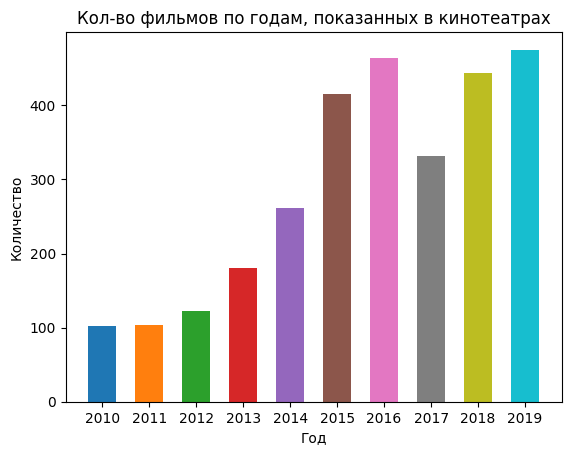

In [204]:
from matplotlib.colors import Normalize, to_rgba
# Устанавливаем ширину каждого столбца
width = 0.6

# Создаем список цветов для каждого столбца
colors = [to_rgba(plt.cm.tab10(i)) for i in range(len(df))]

# Создаем столбчатую диаграмму
bars = plt.bar(df_all_films['start_year'], df_all_films['box_office'], width=width, color=colors)

# Добавляем название для оси x
plt.xlabel('Год')

# Добавляем название для оси y
plt.ylabel('Количество')

# Добавляем заголовок графика
plt.title('Кол-во фильмов по годам, показанных в кинотеатрах')

# Добавляем подписи категорий
plt.xticks(df_all_films['start_year'])

# Отображаем график
plt.show()

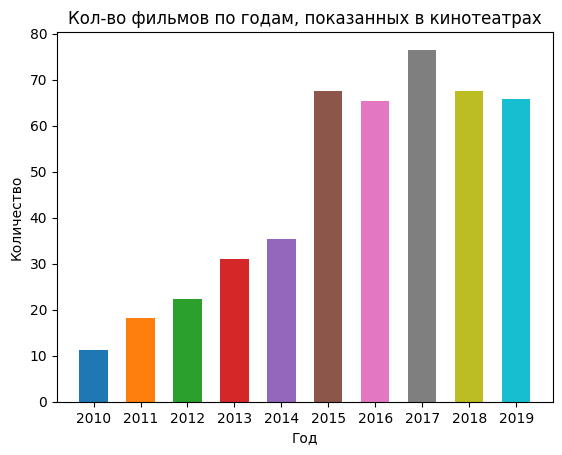

In [205]:
# Устанавливаем ширину каждого столбца
width = 0.6

# Создаем список цветов для каждого столбца
colors = [to_rgba(plt.cm.tab10(i)) for i in range(len(df))]

# Создаем столбчатую диаграмму
bars = plt.bar(df_all_films['start_year'], df_all_films['ratio_in_%'], width=width, color=colors)

# Добавляем название для оси x
plt.xlabel('Год')

# Добавляем название для оси y
plt.ylabel('Количество')

# Добавляем заголовок графика
plt.title('Кол-во фильмов по годам, показанных в кинотеатрах')

# Добавляем подписи категорий
plt.xticks(df_all_films['start_year'])

# Отображаем график
plt.show()

In [206]:
df_all_films.corr()

,start_year,box_office,count_null,ratio_in_%
start_year,1.000000,0.921354,-0.830617,0.922320
box_office,0.921354,1.000000,-0.765775,0.925235
count_null,-0.830617,-0.765775,1.000000,-0.904463
ratio_in_%,0.922320,0.925235,-0.904463,1.000000


**Вывод**

Данные в выборке неоднородны. За период с 2010 по 2014 год в кинотеатре было показано меньше всего фильмов по сравнению с другими годами. Это не означает, что в эти годы было наименьшее количество кинопоказов.

Наибольшее количество кинопоказов пришлось на 2019 год, хотя доля этих фильмов в нашей выборке за этот год не самая большая по сравнению с другими годами.

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

In [207]:
df_trend_box = df.groupby('start_year')['box_office'].agg('sum')
df_trend_box

start_year
2010    2.417409e+06
2011    2.056610e+06
2012    6.861208e+06
2013    2.967979e+07
2014    7.317079e+09
2015    3.761280e+10
2016    4.580496e+10
2017    4.612053e+10
2018    4.682029e+10
2019    4.829240e+10
Name: box_office, dtype: float64

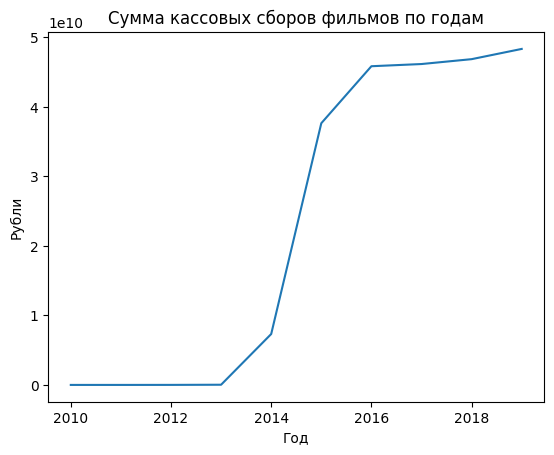

In [208]:
# Строим линейный график
plt.plot(df_trend_box)

# Добавляем название для оси x
plt.xlabel('Год')

# Добавляем название для оси y
plt.ylabel('Рубли')

# Добавляем заголовок графика
plt.title('Сумма кассовых сборов фильмов по годам')

# Отображаем график
plt.show()

**Вывод**

В зависимости от того, как считать, можно получить разные результаты. Если учитывать общую сумму сборов за все годы, то максимальный показатель приходится на 2018 год. А вот данные за период с 2010 по 2014 годы не стоит учитывать, так как их меньше всего, поэтому минимальный показатель сборов был зафиксирован в 2015 году.

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

In [209]:
df.groupby('start_year')['box_office'].agg(['mean', 'median'])

,mean,median
start_year,,
2010,2.370009e+04,1700.00
2011,1.977510e+04,2995.00
2012,5.623941e+04,5660.00
2013,1.648877e+05,3522.50
2014,2.792778e+07,17952.50
2015,9.063326e+07,7196756.00
2016,9.871758e+07,5281042.10
2017,1.389172e+08,10668801.50
2018,1.056891e+08,10484019.76


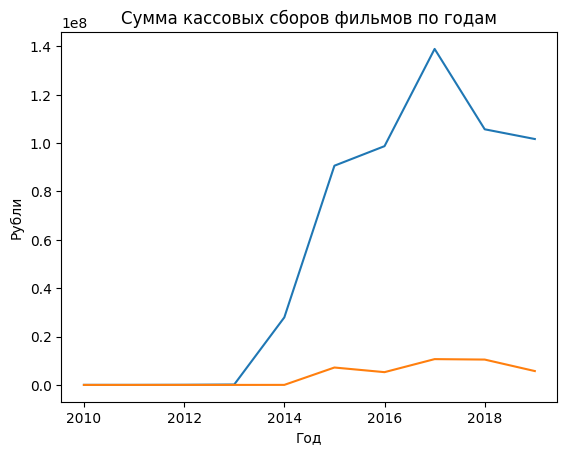

In [210]:
# Строим линейный график
plt.plot(df.groupby('start_year')['box_office'].agg(['mean', 'median']))

# Добавляем название для оси x
plt.xlabel('Год')

# Добавляем название для оси y
plt.ylabel('Рубли')

# Добавляем заголовок графика
plt.title('Сумма кассовых сборов фильмов по годам')

# Отображаем график
plt.show()

**Вывод**

Мы видим, что данные о сборах сильно различаются. Это заметно по разрыву между средним значением и медианой. Это указывает на то, что в данных есть значения, соответствующие невероятно высоким сборам по сравнению с остальными. Для киноиндустрии это вполне обычное явление.

Судя по всему, самым прибыльным годом для кинопроката стал 2017 год. Это подтверждается как средним значением, так и медианой.

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

In [211]:
df.loc[df['start_year'] >= 2015].groupby('age_restriction')['box_office'].sum().sort_values()

age_restriction
«0+» - для любой зрительской аудитории    6.542488e+08
«18+» - запрещено для детей               4.046732e+10
«6+» - для детей старше 6 лет             5.214915e+10
«12+» - для детей старше 12 лет           5.829102e+10
«16+» - для детей старше 16 лет           7.308923e+10
Name: box_office, dtype: float64

In [215]:
df_group_by_year = df.query('2015 <= start_year').groupby(['start_year', 'age_restriction'])['box_office'].agg('sum').reset_index()
df_group_by_year.head()

,start_year,age_restriction,box_office
0,2015,«0+» - для любой зрительской аудитории,3.275774e+08
1,2015,«12+» - для детей старше 12 лет,1.361551e+10
2,2015,«16+» - для детей старше 16 лет,1.106221e+10
3,2015,«18+» - запрещено для детей,5.270763e+09
4,2015,«6+» - для детей старше 6 лет,7.336735e+09


В период с 2015 по 2019 год наибольшие кассовые сборы были у фильмов с возрастным ограничением 16+.

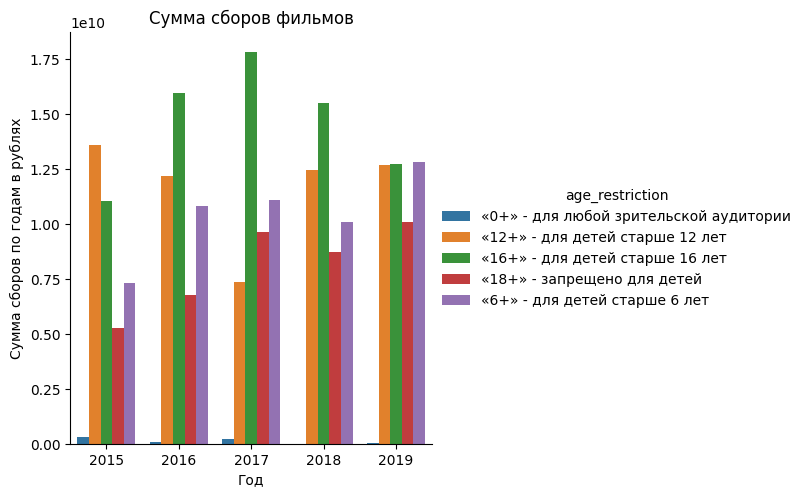

In [216]:
import seaborn as sns

fg = sns.catplot(x='start_year', y='box_office', hue='age_restriction', data=df_group_by_year, kind='bar');
plt.title('Сумма сборов фильмов');
plt.xlabel('Год');
plt.ylabel('Сумма сборов по годам в рублях');

Согласно графику, в большинстве лет лидирует по сборам кино для зрителей старше 16 лет. В 2015 году лидерами стали фильмы для зрителей старше 12 лет, а в 2019 году — для детей от 6 лет.

**Вывод**

Из этого можно сделать вывод, что фильмы для взрослых зрителей собирают больше всего денег, но это не всегда так.

### Шаг 5. Напишите общий вывод

В данных было обнаружено несколько ошибок, которые были исправлены:

* удалены лишние пробелы в категориальных переменных;
* значения рейтингов в процентах для некоторых строк были заменены на NaN;
* в датасете были найдены дубликаты названий фильмов, но у этих кинофильмов были разные номера прокатных удостоверений, поэтому данные были оставлены без дополнительной обработки;
* также были найдены фильмы с одинаковыми номерами прокатных удостоверений. Однако после проверки на официальном сайте было подтверждено, что это действительно так.

Больше всего фильмов с суммой поддержки до 100 миллионов рублей. В основном это фильмы с рейтингом чуть больше 6 баллов. При этом не было найдено плохих фильмов (с оценкой ниже 5 баллов) с суммой поддержки более 200 миллионов рублей.

По количеству и по сумме поддержки на первом месте находится жанр «драма», на втором — «комедия». Самую большую сумму поддержки получил Фёдор Бондарчук.